In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = pd.read_csv("/home/techfield/class/Presentations/USPS/usps_digit_recognizer.csv")

In [3]:
digits.shape

(42000, 785)

In [25]:
D = 784
K = 10

In [4]:
y = digits.label

In [5]:
#X = digits.loc[:,"pixel0":"pixel783"]


In [39]:
seed = 10
train1=digits.sample(frac=.6,random_state = seed)
training_target = train1.label.values
train= train1.drop("label",axis=1)

validate_test = digits.loc[~digits.index.isin(train1.index)]

validate_origin = validate_test.sample(frac=.5,random_state = seed )
validate1 = validate_origin.drop("label",axis=1)
validate_target = validate_origin.label.values
validate = validate1

test = validate_test.loc[~validate_test.index.isin(validate_origin.index)]
test_no_y = test.drop("label",axis=1)
test_target = test.label.values

In [40]:
cols = train.columns
train['> zero'] = train[cols].gt(0).sum(axis=1)

In [29]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
      #  try:
        Y[i,y[i]] = 1
       # except:
         #   pdb.set_trace()
        
    return Y

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def cross_entropy(Y,P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y,P_hat):
    return np.mean(y == P_hat.argmax(axis =1))


    

In [19]:
#training_target

In [30]:
PHI = np.column_stack((np.ones((25200,1)), train))
Y = one_hot_encode(training_target)

/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


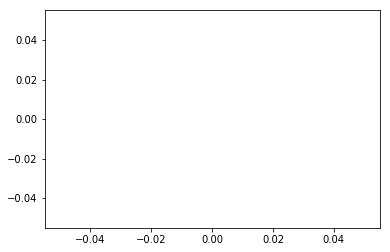

In [26]:
W = np.random.randn(D+1,K)

eta = 5e-3
epochs = int(1e3)
J = np.zeros(epochs)

for epoch in range(epochs):
    P_hat = softmax(PHI.dot(W))
    J[epoch] = cross_entropy(Y,P_hat)
    W -= eta*PHI.T.dot(P_hat - Y)
    
plt.figure()
plt.plot(J)

In [28]:
print("Accuracy: {:0.4f}".format(accuracy(training_target,P_hat)))

Accuracy: 0.0987
